In [27]:
import analysis

In [28]:
dir = 1
move_thresh = 0.25
trial = analysis.gridCells('datasets/'+str(dir)+'/',move_thresh)

In [29]:
trial.phase_analysis()

0.19769212685469456

NameError: name 'width' is not defined

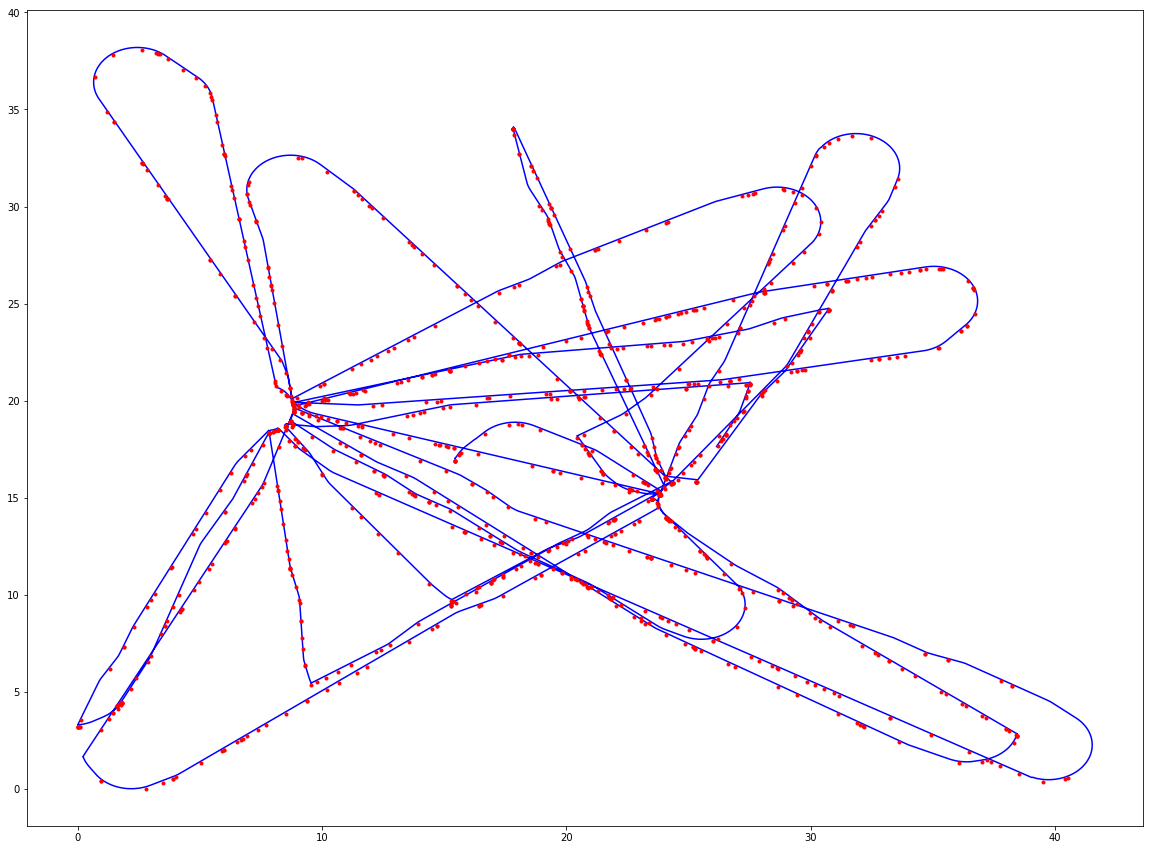

In [30]:
trial.prediction_plot()

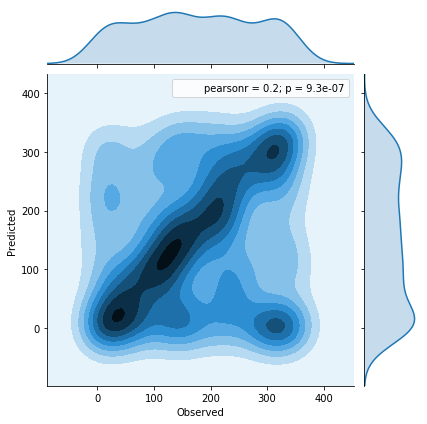

In [31]:
trial.correlation_plot()

C:\Users\Daniel\PycharmProjects\Grid-Cell\analysis.py:25: RuntimeWarning: Mean of empty slice
  mpm_dict[ybin][xbin] = np.nanmean(np.asarray(phases))


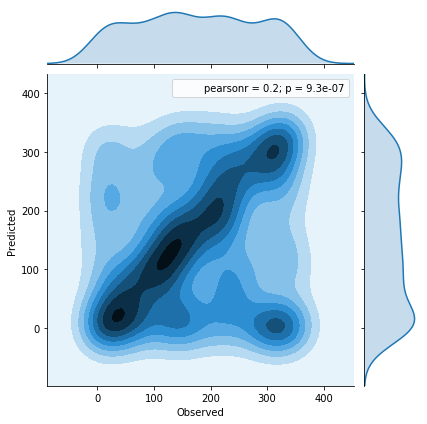

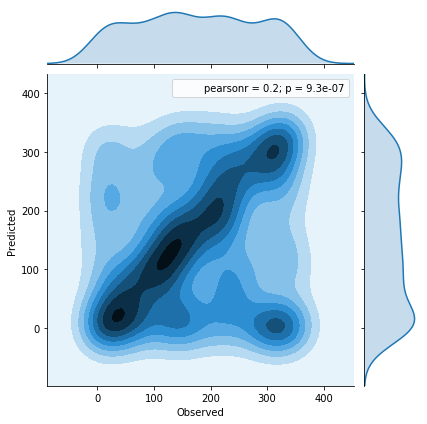

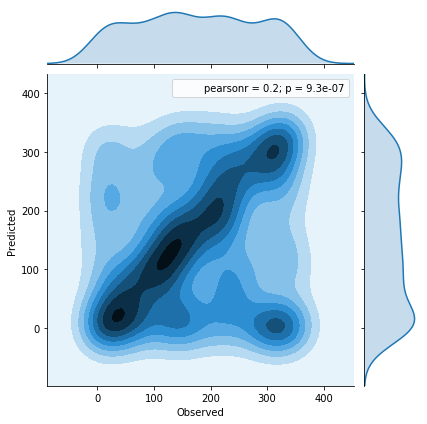

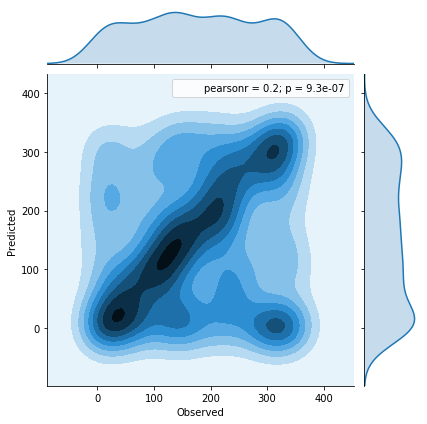

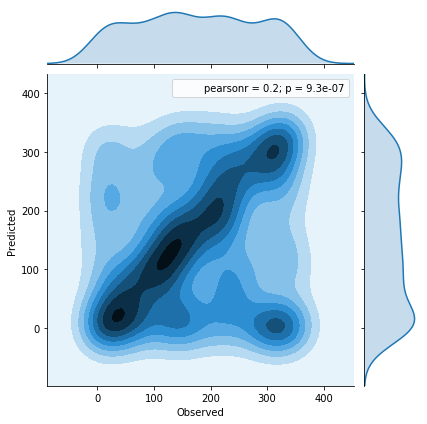

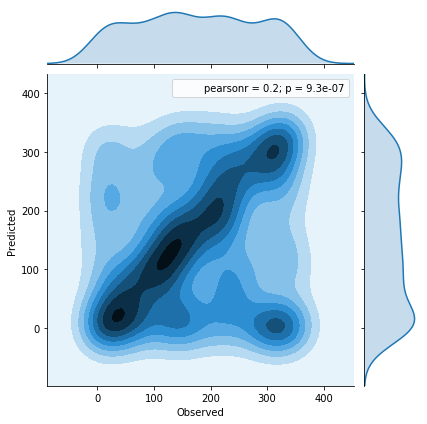

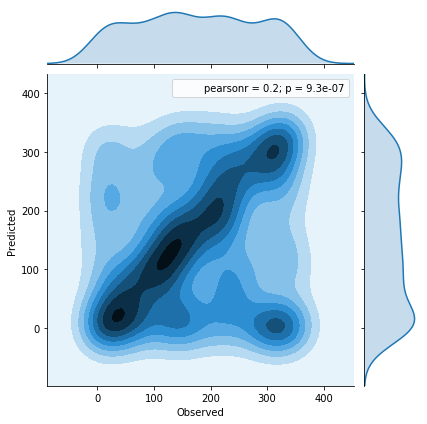

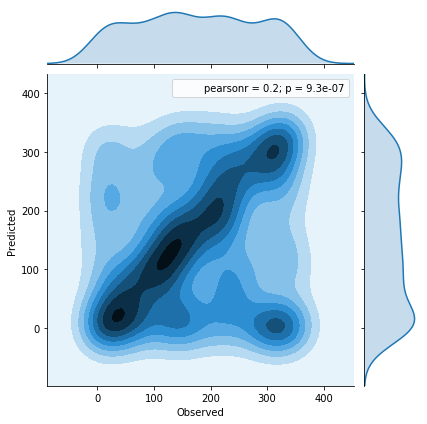

In [33]:
for i in range(8):
    a = analysis.gridCells('datasets/1/',0.25)
    a.phase_analysis()
    a.correlation_plot()
